In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mall_data = pd.read_csv('C:\Users\ab522tx\Desktop\datasets\Mall_Customers.csv')

In [2]:
mall_data = pd.read_csv(r'C:\Users\ab522tx\Desktop\datasets\Mall_Customers.csv')

In [3]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_data.Genre.count()

200

Female    112
Male       88
Name: Genre, dtype: int64

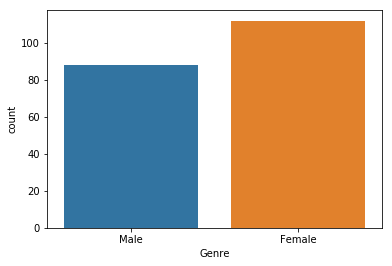

In [5]:
sns.countplot("Genre",data=mall_data)
mall_data.Genre.value_counts()

In [6]:
youngsters = mall_data[(mall_data["Age"]<25)]

In [7]:
youngsters.Age.value_counts()

19    8
23    6
21    5
20    5
24    4
18    4
22    3
Name: Age, dtype: int64

In [8]:
youngsters.Genre.value_counts()

Female    19
Male      16
Name: Genre, dtype: int64

C:\Users\ab522tx\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


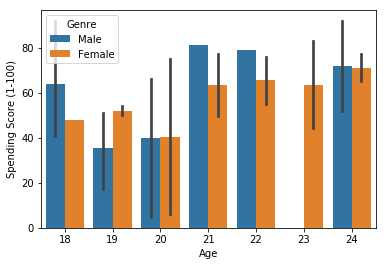

In [9]:
sns.barplot("Age","Spending Score (1-100)","Genre",data=youngsters)

C:\Users\ab522tx\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


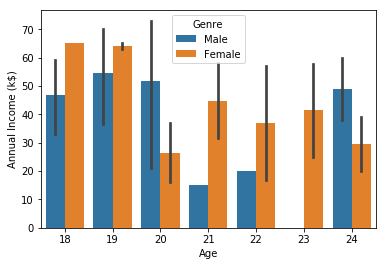

In [10]:
sns.barplot("Age","Annual Income (k$)","Genre",data=youngsters)

C:\Users\ab522tx\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


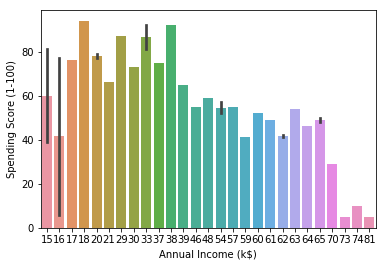

In [11]:
sns.barplot("Annual Income (k$)","Spending Score (1-100)",data=youngsters,)

In [12]:
income_data1 = mall_data[((mall_data["Annual Income (k$)"]>20) & (mall_data["Annual Income (k$)"]<50) )]

In [13]:
income_data1.Genre.value_counts()

Female    33
Male      23
Name: Genre, dtype: int64

C:\Users\ab522tx\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


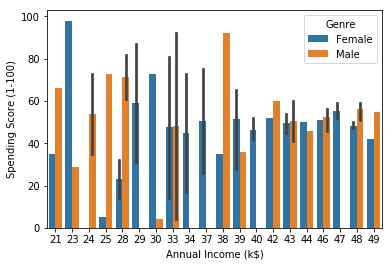

In [14]:
sns.barplot("Annual Income (k$)","Spending Score (1-100)","Genre",income_data1)

In [15]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [16]:
mall_data.Genre = Le.fit_transform(mall_data["Genre"])

In [17]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [18]:
from sklearn.cluster import KMeans

In [19]:
X = mall_data.iloc[:, [3, 4]]

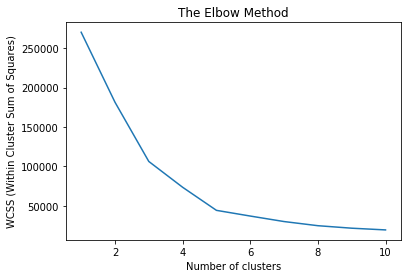

In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 4)

In [22]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
X = mall_data.iloc[:, [2, 4]]

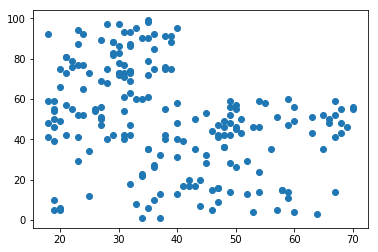

In [25]:
plt.scatter(X["Age"],X["Spending Score (1-100)"])

Text(0, 0.5, 'Spending Score (1-100)')

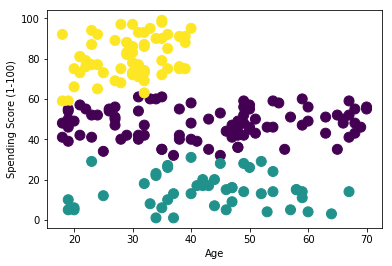

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 4)
plt.scatter(X["Age"],X["Spending Score (1-100)"],c=kmeans.fit_predict(X),s=100,alpha=5,)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Spending Score (1-100)')

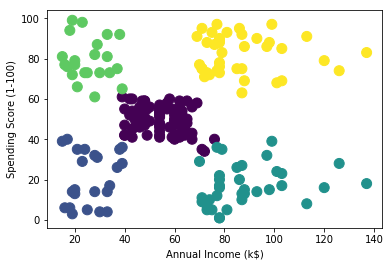

In [27]:
X = mall_data.iloc[:, [3, 4]]
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 4)
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c=kmeans.fit_predict(X),s=100,alpha=5,)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")